In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [65]:
# import the cleaned data
df = pd.read_pickle('./data/final_eda',compression='zip' )
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30 06:21:45+00:00,Null,NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,True,NaN,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06 00:00:00+00:00,False,False,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21 00:00:00+00:00,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20 00:00:00+00:00,False,False,1,My boyfriend and I bought this to spice things...,Not worth it,samantha,Negative


In [3]:
# Since we only need a few columns for text processing we will reduce the data set.
df = df[['reviews_text', 'reviews_title', 'user_sentiment']]
df.head()

,reviews_text,reviews_title,user_sentiment
0,i love this album. it's very good. more to the...,Just Awesome,Positive
1,Good flavor. This review was collected as part...,Good,Positive
3,I read through the reviews on here before look...,Disappointed,Negative
4,My husband bought this gel for us. The gel cau...,Irritation,Negative
5,My boyfriend and I bought this to spice things...,Not worth it,Negative


In [4]:
df.shape

(27403, 3)

## Text Preprocessing

We will follow the below cleaning process,

1. Remove punctuations
2. Remove special characters
3. Stop Words Removal
4. Stemming and Lemmatization

In [5]:
# Useful functions for text manipulation
import nltk
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

import string

punc_ext = string.punctuation
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))


def lower_data(col):
    lower_col = col.apply(lambda x: x.lower())
    return lower_col

def remove_punctuation(text):
    return text.translate(text.maketrans('', '', punc_ext))

def remove_special_characters(col):
    no_special_characters = col.replace(r'[^A-Za-z0-9 ]+', '', regex=True)
    return no_special_characters

def remove_whitespace(col):
    # replace more than 1 space with 1 space
    merged_spaces = col.apply(lambda x: x.replace(r"\s\s+",' '))
    # delete beginning and trailing spaces
    trimmed_spaces = merged_spaces.apply(lambda x: x.strip())
    return trimmed_spaces

def remove_website_links(col):
    no_website_links = col.str.replace(r"http\S+", "")
    return no_website_links

def remove_numbers(col):
    removed_numbers = col.apply(lambda x: x.replace(r'\d+',''))
    return removed_numbers

def remove_emails(col):
    no_emails = col.apply(lambda x: x.replace(r"\S*@\S*\s?", ""))
    return no_emails

def tokenize_col(col):
    tokenized_col = col.apply(lambda x: tokenizer.tokenize(str(x)))
    return tokenized_col

def remove_stopwords(text): 
    words = [w for w in text if w not in stopwords.words('english')]
    return words



In [6]:
# lower text
df['reviews_text'] = lower_data(df['reviews_text'])
df['reviews_title'] = lower_data(df['reviews_title'])

# Remove whitespaces
df['reviews_text'] = remove_whitespace(df['reviews_text'])
df['reviews_title'] = remove_whitespace(df['reviews_title'])

# Remove punctuations
df['reviews_text'] = df['reviews_text'].apply(lambda line: remove_punctuation(line))
df['reviews_title'] = df['reviews_title'].apply(lambda line: remove_punctuation(line))

# Remove special characters
df['reviews_text'] = remove_special_characters(df['reviews_text'])
df['reviews_title'] = remove_special_characters(df['reviews_title'])

# Remove website links
df['reviews_text'] = remove_website_links(df['reviews_text'])
df['reviews_title'] = remove_website_links(df['reviews_title'])

# Remove emails
df['reviews_text'] = remove_emails(df['reviews_text'])
df['reviews_title'] = remove_emails(df['reviews_title'])

# Remove numbers
df['reviews_text'] = remove_numbers(df['reviews_text'])
df['reviews_title'] = remove_numbers(df['reviews_title'])



In [7]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

### Visualising the commonly used words in text and title of reviews

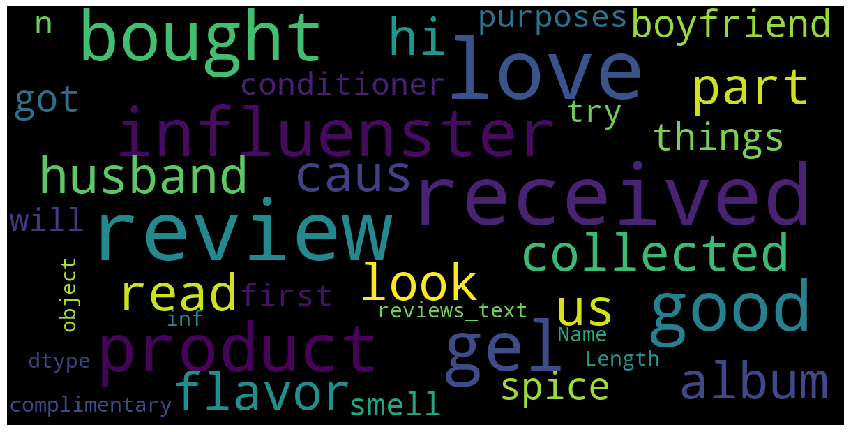

In [8]:
show_wordcloud(df['reviews_text'])

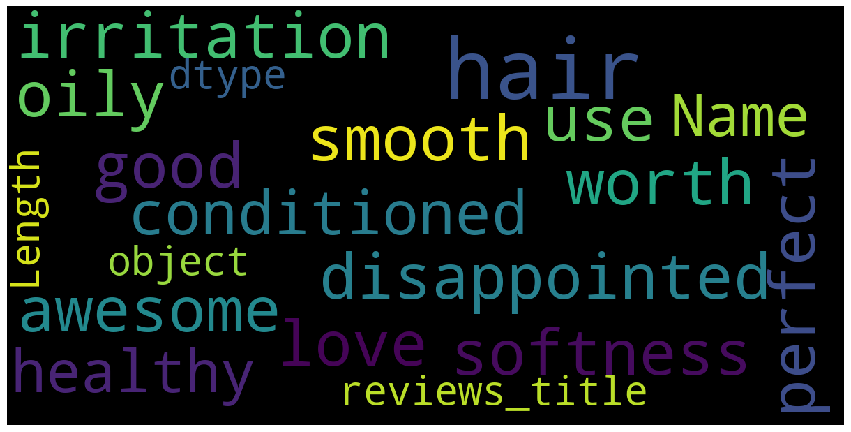

In [9]:
show_wordcloud(df['reviews_title'])

In [10]:
df['Independent_Var'] = df['reviews_text'] + ' ' + df['reviews_title']

In [11]:
df['Independent_Var'].head()

0    i love this album its very good more to the hi...
1    good flavor this review was collected as part ...
3    i read through the reviews on here before look...
4    my husband bought this gel for us the gel caus...
5    my boyfriend and i bought this to spice things...
Name: Independent_Var, dtype: object

In [12]:
# The goal of both stemming and lemmatization is to 
# reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

# Adopting Lemmatization gives an added advantage of getting meaningful and accurate
# root words clubbed from different forms.

# Hence we will use Lemmatization in our project to retain the meaning.
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def word_lemmatizer(text):
    
    words = word_tokenize(text)
    
    words = [word for word in words if word not in stopwords.words("english")]

    lem_text = [lemmatizer.lemmatize(i) for i in words]
    lem_text = " ".join(lem_text)
    
    return lem_text

df['Independent_Var'] = [ word_lemmatizer(i) for i in df['Independent_Var']]

In [13]:
df['Independent_Var'].head()

0    love album good hip hop side current pop sound...
1     good flavor review collected part promotion good
3    read review looking buying one couple lubrican...
4    husband bought gel u gel caused irritation fel...
5    boyfriend bought spice thing bedroom highly di...
Name: Independent_Var, dtype: object

In [14]:
# For user sentiments, converting the true value to 1 and rest 0, and this is out target variable
df['user_sentiment'] = np.where((df['user_sentiment'] == 'Positive'), 1, 0)

In [15]:
X = df['Independent_Var']
y = df['user_sentiment']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

train_text_list=X_train.tolist()
test_text_list=X_test.tolist()

In [17]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (19182,)
y_train (19182,)
X_test (8221,)
y_test (8221,)


### TF-IDF model

In [18]:
# For Model Building

from sklearn.feature_extraction.text import TfidfVectorizer

tfidfconverter = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))

X_train = tfidfconverter.fit_transform(train_text_list).toarray()
X_test = tfidfconverter.transform(test_text_list).toarray()

### Count Vectorizer

In [19]:
# For Naive Bayes model Building

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english',max_features=5000)
vect.fit(train_text_list)

X_train_nb = vect.transform(train_text_list)
X_test_nb =vect.transform(test_text_list)


## Model Building

In [20]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score
from sklearn.metrics import confusion_matrix

In [21]:
## Collects all the models evaluation for comparison
evaluation_table = pd.DataFrame()

In [22]:
# Helper function for evaluation

def evaluation_helper(confusion, stats):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives 
    stats['Sensitivity'] = TP / float(TP+FN)
    stats['Precision'] = TP / float(TP + FP)
    stats['Specificity'] = TN / float(TN+FP)
    return stats

In [23]:
# Model 1: Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

classifier = RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=10,
                                    n_estimators=100, random_state=42, n_jobs=-1)
classifier.fit(X_train, y_train)
preds1 = classifier.predict(X_test)

In [24]:
print("Random Forest Model accuracy", accuracy_score(preds1, y_test))
print(classification_report(preds1, y_test))
print(confusion_matrix(preds1, y_test))

Random Forest Model accuracy 0.7545310789441674
              precision    recall  f1-score   support

           0       0.65      0.25      0.36      2279
           1       0.77      0.95      0.85      5942

    accuracy                           0.75      8221
   macro avg       0.71      0.60      0.61      8221
weighted avg       0.73      0.75      0.71      8221

[[ 577 1702]
 [ 316 5626]]


In [25]:
metrics = dict()
metrics['Accuracy'] = accuracy_score(y_test, preds1)
stats = confusion_matrix(y_test, preds1)

In [26]:
evaluation_table = evaluation_table.append(pd.Series(evaluation_helper(stats, metrics),name='RF Model'))
evaluation_table.head()

,Accuracy,Precision,Sensitivity,Specificity
RF Model,0.754531,0.946819,0.76774,0.646137


In [27]:
# Model 2 with Xgboost

# import xgboost as xgb

# # xgb = xgb.XGBClassifier(n_jobs=1)
# # xgb.fit(X_train, y_train)
# # preds2 = xgb.predict(X_test)

# XGBClassifier = xgb.XGBClassifier

# # fit model no training data
# model = XGBClassifier()
# model.fit(X_train, y_train)


# # make predictions for test data
# y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]


In [28]:
# # evaluate predictions
# print("XGBoost Model accuracy", accuracy_score(y_test, predictions))
# print(classification_report(predictions, y_test))
# print(confusion_matrix(predictions, y_test))

In [29]:
# Model3: Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

logit = LogisticRegression(random_state=42, C = 3.5, class_weight= 'balanced')
logit.fit(X_train, y_train)
preds3 = logit.predict(X_test)

In [30]:
print("Logistic Regression accuracy", accuracy_score(preds3, y_test))
print(classification_report(preds3, y_test))
print(confusion_matrix(preds3, y_test))

Logistic Regression accuracy 0.8696022381705388
              precision    recall  f1-score   support

           0       0.79      0.44      0.57      1589
           1       0.88      0.97      0.92      6632

    accuracy                           0.87      8221
   macro avg       0.83      0.71      0.75      8221
weighted avg       0.86      0.87      0.85      8221

[[ 705  884]
 [ 188 6444]]


In [31]:
metrics = dict()
metrics['Accuracy'] = accuracy_score(y_test, preds3)
stats = confusion_matrix(y_test, preds3)

In [32]:
evaluation_table = evaluation_table.append(pd.Series(evaluation_helper(stats, metrics),name='LR Model'))
evaluation_table.head()

,Accuracy,Precision,Sensitivity,Specificity
RF Model,0.754531,0.946819,0.767740,0.646137
LR Model,0.869602,0.971653,0.879367,0.789474


In [33]:
# Model4 Multinomial Naive Bayes
# We evaluate this based on Count Vector

from sklearn.naive_bayes import MultinomialNB
m_nb = MultinomialNB()
m_nb.fit(X_train_nb, y_train)

preds4 = m_nb.predict(X_test_nb)

In [34]:
print("Multinomial NB accuracy", accuracy_score(preds4, y_test))
print(classification_report(preds4, y_test))
print(confusion_matrix(preds4, y_test))

Multinomial NB accuracy 0.8705753557961319
              precision    recall  f1-score   support

           0       0.30      0.38      0.34       713
           1       0.94      0.92      0.93      7508

    accuracy                           0.87      8221
   macro avg       0.62      0.65      0.63      8221
weighted avg       0.88      0.87      0.88      8221

[[ 271  442]
 [ 622 6886]]


In [35]:
metrics = dict()
metrics['Accuracy'] = accuracy_score(y_test, preds4)
stats = confusion_matrix(y_test, preds4)

In [36]:
evaluation_table = evaluation_table.append(pd.Series(evaluation_helper(stats, metrics),name='Multinomial NB Model'))
evaluation_table.head()

,Accuracy,Precision,Sensitivity,Specificity
RF Model,0.754531,0.946819,0.767740,0.646137
LR Model,0.869602,0.971653,0.879367,0.789474
Multinomial NB Model,0.870575,0.917155,0.939683,0.303471


In [37]:
# Lets check class imbalance in target variable

df['user_sentiment'].value_counts()

1    24372
0     3031
Name: user_sentiment, dtype: int64

In [38]:
# As there is imbalance in data we will balance the data and build the models again
# And based on this find the model that is best for our data.
# We will use SMOTE

In [39]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Pre SMOTE', Counter(y_train))

smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

print('Post Smote', Counter(y_train_smt))

Pre SMOTE Counter({1: 17044, 0: 2138})
Post Smote Counter({1: 17044, 0: 17044})


In [40]:
# applying the same for CountVectors

print('Pre SMOTE', Counter(y_train))

smt = SMOTE()
X_train_nbsmt, y_train_nbsmt = smt.fit_resample(X_train_nb, y_train)

print('Post Smote', Counter(y_train_nbsmt))

Pre SMOTE Counter({1: 17044, 0: 2138})
Post Smote Counter({1: 17044, 0: 17044})


### Model Building with Balanced Dataset

In [41]:
# Model 1: Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

classifier = RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=10,
                                    n_estimators=100, random_state=42, n_jobs=-1)
classifier.fit(X_train_smt, y_train_smt)
preds1 = classifier.predict(X_test)

In [42]:
print("Random Forest Model accuracy", accuracy_score(preds1, y_test))
print(classification_report(preds1, y_test))
print(confusion_matrix(preds1, y_test))

Random Forest Model accuracy 0.7958885780318696
              precision    recall  f1-score   support

           0       0.40      0.24      0.30      1501
           1       0.84      0.92      0.88      6720

    accuracy                           0.80      8221
   macro avg       0.62      0.58      0.59      8221
weighted avg       0.76      0.80      0.77      8221

[[ 358 1143]
 [ 535 6185]]


In [43]:
metrics = dict()
metrics['Accuracy'] = accuracy_score(y_test, preds1)
stats = confusion_matrix(y_test, preds1)

In [44]:
evaluation_table = evaluation_table.append(pd.Series(evaluation_helper(stats, metrics),name='RF Model Balanced'))
evaluation_table.head()

,Accuracy,Precision,Sensitivity,Specificity
RF Model,0.754531,0.946819,0.767740,0.646137
LR Model,0.869602,0.971653,0.879367,0.789474
Multinomial NB Model,0.870575,0.917155,0.939683,0.303471
RF Model Balanced,0.795889,0.920387,0.844023,0.400896


In [45]:
# Model3: Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

logit_bal = LogisticRegression(random_state=42, C = 3.5, class_weight= 'balanced')
logit_bal.fit(X_train_smt, y_train_smt)
preds3 = logit_bal.predict(X_test)

In [46]:
print("Logistic Regression accuracy", accuracy_score(preds3, y_test))
print(classification_report(preds3, y_test))
print(confusion_matrix(preds3, y_test))

Logistic Regression accuracy 0.875562583627296
              precision    recall  f1-score   support

           0       0.74      0.46      0.57      1460
           1       0.89      0.97      0.93      6761

    accuracy                           0.88      8221
   macro avg       0.82      0.71      0.75      8221
weighted avg       0.87      0.88      0.86      8221

[[ 665  795]
 [ 228 6533]]


In [47]:
metrics = dict()
metrics['Accuracy'] = accuracy_score(y_test, preds3)
stats = confusion_matrix(y_test, preds3)

In [48]:
evaluation_table = evaluation_table.append(pd.Series(evaluation_helper(stats, metrics), name='LR Model Balanced'))
evaluation_table.head()

,Accuracy,Precision,Sensitivity,Specificity
RF Model,0.754531,0.946819,0.767740,0.646137
LR Model,0.869602,0.971653,0.879367,0.789474
Multinomial NB Model,0.870575,0.917155,0.939683,0.303471
RF Model Balanced,0.795889,0.920387,0.844023,0.400896
LR Model Balanced,0.875563,0.966277,0.891512,0.744681


In [49]:
# Model4 Multinomial Naive Bayes
# We evaluate this based on Count Vector

from sklearn.naive_bayes import MultinomialNB
m_nb = MultinomialNB()
m_nb.fit(X_train_nbsmt, y_train_nbsmt)

preds4 = m_nb.predict(X_test_nb)

In [50]:
print("Multinomial NB accuracy", accuracy_score(preds4, y_test))
print(classification_report(preds4, y_test))
print(confusion_matrix(preds4, y_test))

Multinomial NB accuracy 0.8036735190366135
              precision    recall  f1-score   support

           0       0.45      0.26      0.33      1519
           1       0.85      0.93      0.88      6702

    accuracy                           0.80      8221
   macro avg       0.65      0.59      0.61      8221
weighted avg       0.77      0.80      0.78      8221

[[ 399 1120]
 [ 494 6208]]


In [51]:
metrics = dict()
metrics['Accuracy'] = accuracy_score(y_test, preds4)
stats = confusion_matrix(y_test, preds4)

In [52]:
evaluation_table = evaluation_table.append(pd.Series(evaluation_helper(stats, metrics),name='Multinomial NB Model Balanced'))
evaluation_table.head()

,Accuracy,Precision,Sensitivity,Specificity
RF Model,0.754531,0.946819,0.767740,0.646137
LR Model,0.869602,0.971653,0.879367,0.789474
Multinomial NB Model,0.870575,0.917155,0.939683,0.303471
RF Model Balanced,0.795889,0.920387,0.844023,0.400896
LR Model Balanced,0.875563,0.966277,0.891512,0.744681


In [53]:
# Lets tune RF model which has imbalance
from sklearn.model_selection import GridSearchCV
%time

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight="balanced")
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [4,5,10,15],
    'min_samples_leaf': [5, 10, 20],
    'max_features': [10,20],
    'n_estimators': [30, 50,60]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "recall")
grid_search.fit(X_train, y_train)
rf2 = grid_search.best_estimator_

preds5 = rf2.predict(X_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 28.1 µs
Fitting 4 folds for each of 72 candidates, totalling 288 fits


In [54]:
print("Random Forest Model accuracy", accuracy_score(preds5, y_test))
print(classification_report(preds5, y_test))
print(confusion_matrix(preds5, y_test))

Random Forest Model accuracy 0.801119085269432
              precision    recall  f1-score   support

           0       0.68      0.31      0.43      1962
           1       0.82      0.95      0.88      6259

    accuracy                           0.80      8221
   macro avg       0.75      0.63      0.65      8221
weighted avg       0.78      0.80      0.77      8221

[[ 610 1352]
 [ 283 5976]]


In [55]:
evaluation_table = evaluation_table.append(pd.Series(evaluation_helper(stats, metrics),name='RF Model Tuned'))
evaluation_table.head()

,Accuracy,Precision,Sensitivity,Specificity
RF Model,0.754531,0.946819,0.767740,0.646137
LR Model,0.869602,0.971653,0.879367,0.789474
Multinomial NB Model,0.870575,0.917155,0.939683,0.303471
RF Model Balanced,0.795889,0.920387,0.844023,0.400896
LR Model Balanced,0.875563,0.966277,0.891512,0.744681


In [56]:
# Lets tune RF model which has no imbalance
from sklearn.model_selection import GridSearchCV
%time

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight="balanced")
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [4,5,10,15],
    'min_samples_leaf': [5, 10, 20],
    'max_features': [10,20],
    'n_estimators': [30, 50,60]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "recall")
grid_search.fit(X_train_smt, y_train_smt)
rf2 = grid_search.best_estimator_

preds6 = rf2.predict(X_test)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 26 µs
Fitting 4 folds for each of 72 candidates, totalling 288 fits


In [57]:
print("Random Forest Model accuracy", accuracy_score(preds6, y_test))
print(classification_report(preds6, y_test))
print(confusion_matrix(preds6, y_test))

Random Forest Model accuracy 0.8199732392652962
              precision    recall  f1-score   support

           0       0.45      0.29      0.35      1387
           1       0.87      0.93      0.90      6834

    accuracy                           0.82      8221
   macro avg       0.66      0.61      0.62      8221
weighted avg       0.79      0.82      0.80      8221

[[ 400  987]
 [ 493 6341]]


In [58]:
evaluation_table = evaluation_table.append(pd.Series(evaluation_helper(stats, metrics),name='RF Model Tuned Balanced'))
evaluation_table.head(20)

,Accuracy,Precision,Sensitivity,Specificity
RF Model,0.754531,0.946819,0.767740,0.646137
LR Model,0.869602,0.971653,0.879367,0.789474
Multinomial NB Model,0.870575,0.917155,0.939683,0.303471
RF Model Balanced,0.795889,0.920387,0.844023,0.400896
LR Model Balanced,0.875563,0.966277,0.891512,0.744681
Multinomial NB Model Balanced,0.803674,0.926291,0.847162,0.446809
RF Model Tuned,0.803674,0.926291,0.847162,0.446809
RF Model Tuned Balanced,0.803674,0.926291,0.847162,0.446809


In [59]:
# From the evaluation table we can select the best model as LR Model Balanced
# Handling imbalance in data and applying logistic regression
# Has accuracy of 87.27%

In [64]:
# Pickling the best model
# This will be useful for predictions of fresh data

import pickle

# We will save the the vectorizer and the logistic regression model
# This will be useful for us when we want to predict
# We will also dump the cleaned dataset

pickle.dump(tfidfconverter, open('./pickle/vectorizer.pkl','wb'))

pickle.dump(logit_bal, open('./pickle/model.pkl','wb'))

df.to_pickle('./data/cleaned_text_data', compression='zip')